In [1]:
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns

import tinygraph as tg
import sys

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.append('/home/williamsjl/tinygraph/tests')
import graph_test_suite

In [3]:
out = []

basic_suite = graph_test_suite.create_suite()
vp_suite = graph_test_suite.create_suite_vert_prop()
ep_suite = graph_test_suite.create_suite_edge_prop()

suite = {**basic_suite, **vp_suite, **ep_suite}

l = len(suite)

for i, k in enumerate(suite.keys()):
    print("Progress:" + str(i) + "/" + str(l-1))
    r = (k[:6] == "random")
    for g in suite[k]:
        
        t1 = time.time()
        cc = tg.algorithms.get_connected_components(g)
        t2 = time.time()
        cc_time = t2 - t1
        
        t1 = time.time()
        cycles = tg.algorithms.get_min_cycles(g)
        t2 = time.time()
        cycle_time = t2 - t1

        max_cycle = 0
        for c in cycles:
            le = len(c)
            if le > max_cycle:
                max_cycle = le
        
        res = {'N' : g.node_N, 
               'random' : r, 
               'dtype' : str(g.adjacency.dtype), 
               'n_comps' : len(cc), 
               'max_cycle' : max_cycle, 
               'cc_time_ms' : cc_time*1000, 
               'cycle_time_ms' : cycle_time*1000

              }

        out.append(res)
        
df = pd.DataFrame(out)

Progress:0/141
Progress:1/141
Progress:2/141
Progress:3/141
Progress:4/141
Progress:5/141
Progress:6/141
Progress:7/141
Progress:8/141
Progress:9/141
Progress:10/141
Progress:11/141
Progress:12/141
Progress:13/141
Progress:14/141
Progress:15/141
Progress:16/141
Progress:17/141
Progress:18/141
Progress:19/141
Progress:20/141
Progress:21/141
Progress:22/141
Progress:23/141
Progress:24/141
Progress:25/141
Progress:26/141
Progress:27/141
Progress:28/141
Progress:29/141
Progress:30/141
Progress:31/141
Progress:32/141
Progress:33/141
Progress:34/141
Progress:35/141
Progress:36/141
Progress:37/141
Progress:38/141
Progress:39/141
Progress:40/141
Progress:41/141
Progress:42/141
Progress:43/141
Progress:44/141
Progress:45/141
Progress:46/141
Progress:47/141
Progress:48/141
Progress:49/141
Progress:50/141
Progress:51/141
Progress:52/141
Progress:53/141
Progress:54/141
Progress:55/141
Progress:56/141
Progress:57/141
Progress:58/141
Progress:59/141
Progress:60/141
Progress:61/141
Progress:62/141
Pr

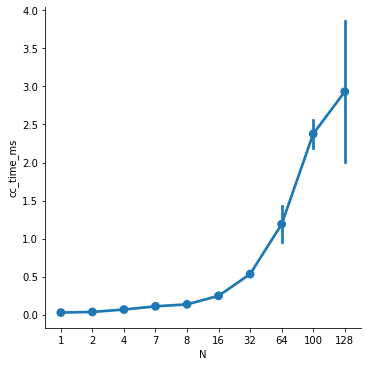

In [4]:
sns.catplot(x='N', y='cc_time_ms', data=df, kind='point')

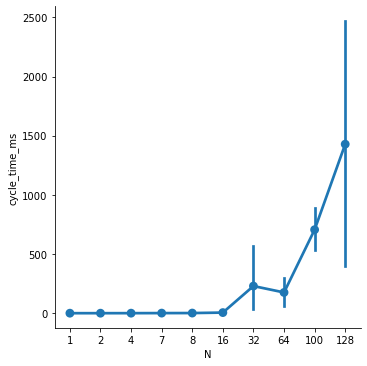

In [5]:
sns.catplot(x='N', y='cycle_time_ms', data=df, kind='point')